In [1]:
import trainer
from utils import get_batch_classifier, slanted_triangular_learning_rate
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [2]:
with open('SentimentAnalysis/full/word2idx.json', 'r') as inp:
    word2idx = json.load(inp)
with open('SentimentAnalysis/full/char2idx.json', 'r') as inp:
    char2idx = json.load(inp)

In [3]:
with open('107_SA/trainer_params.json', 'r') as inp:
    params = json.load(inp)

my_trainer = trainer.Trainer(**params, fine_tune=True)

my_trainer.logger.info('Trainer params {}'.format(params))

tf.reset_default_graph()

Trainer params {'model_configs': {'drop_e': 0.1, 'skip_connection': True, 'projection_dims': 512, 'char_cnn_options': {'n_highways': 2, 'layers': [[1, 16], [2, 16], [3, 32], [4, 64], [5, 128], [6, 256], [7, 512]]}, 'char_vocab_size': 729, 'vocab_size': 122289, 'rnn_layers': [{'drop_o': 0.2, 'drop_i': 0.2, 'units': 1024, 'wdrop': 0.4}, {'drop_o': 0.2, 'units': 1024, 'wdrop': 0.4}, {'drop_o': 0.2, 'units': 1024, 'wdrop': 0.4}], 'char_vec_size': 16}, 'bptt': 100, 'optimizer': {'params': {'weight_decay': 1.2e-06, 'beta2': 0.99, 'beta1': 0.8}, 'name': 'adamw'}, 'train_summary_dir': '107_SA/train_summary/', 'negative_samples': 10000, 'wdecay': 0.0, 'checkpoint_dir': '107_SA/checkpoints/', 'log_path': '107_SA/logs', 'beta': 1e-06, 'use_ema': True, 'test_summary_dir': '107_SA/test_summary/', 'clip_norm': 0.3, 'save_freq': 1000, 'alpha': 1e-06}


In [4]:
classifier_configs = {
    'layers': [
        {'batch_norm': False, 'drop_out': 0.2},
        {'units': 50, 'batch_norm': False, 'drop_out': 0.1, 'activation': 'relu'}
    ], 'n_classes': 3
}
my_trainer.build_classifier(classifier_configs, folder_name='class_train', save_optimizer_var=False)

In [5]:
my_trainer.restore_language_model('107_SA/checkpoints/test_sa/model-full.cpkt-75012')

INFO:tensorflow:Restoring parameters from 107_SA/checkpoints/test_sa/model-full.cpkt-75012


Restoring parameters from 107_SA/checkpoints/test_sa/model-full.cpkt-75012


In [6]:
train_chars = np.load('SentimentAnalysis/full/class_train_char.npy')
train_labels = np.load('SentimentAnalysis/full/class_train_label.npy')

In [7]:
test_chars = np.load('SentimentAnalysis/full/class_test_char.npy')
test_labels = np.load('SentimentAnalysis/full/class_test_label.npy')

In [8]:
train_chars = np.array([x[:300] for x in train_chars])

In [9]:
TRAIN_FOLDER = 'class_train'
TEST_FOLDER = 'class_test'
RATIO = 1/2.6
RATIO1 = RATIO/(1+RATIO)
BATCH_SIZE = 17
BPTT = 70

In [10]:
log_lrs, losses = my_trainer.find_lr_classifier(train_chars, train_labels, BATCH_SIZE, BPTT, [0, 200], init_lr=1e-6, final_lr=1.0, fine_tune_rate=[0, 0, 0, 0])

Batch    1,  lr 0.00000, loss 2.44655, smoothed loss 2.44655
Batch    2,  lr 0.00000, loss 1.80211, smoothed loss 2.12108
Batch    3,  lr 0.00000, loss 2.23021, smoothed loss 2.15819
Batch    4,  lr 0.00000, loss 1.75416, smoothed loss 2.05410
Batch    5,  lr 0.00000, loss 2.36644, smoothed loss 2.11912
Batch    6,  lr 0.00000, loss 1.12724, smoothed loss 1.94535
Batch    7,  lr 0.00000, loss 1.76698, smoothed loss 1.91830
Batch    8,  lr 0.00000, loss 1.32170, smoothed loss 1.83834
Batch    9,  lr 0.00000, loss 1.29042, smoothed loss 1.77243
Batch   10,  lr 0.00000, loss 3.07874, smoothed loss 1.91525
Batch   11,  lr 0.00000, loss 2.50875, smoothed loss 1.97482
Batch   12,  lr 0.00000, loss 2.40929, smoothed loss 2.01518
Batch   13,  lr 0.00000, loss 2.92866, smoothed loss 2.09428
Batch   14,  lr 0.00000, loss 3.02969, smoothed loss 2.17022
Batch   15,  lr 0.00000, loss 2.18877, smoothed loss 2.17164
Batch   16,  lr 0.00000, loss 2.17042, smoothed loss 2.17155
Batch   17,  lr 0.00000,

Batch  136,  lr 0.00050, loss 0.99163, smoothed loss 1.25553
Batch  137,  lr 0.00052, loss 1.19172, smoothed loss 1.25417
Batch  138,  lr 0.00055, loss 1.29008, smoothed loss 1.25494
Batch  139,  lr 0.00058, loss 1.17242, smoothed loss 1.25318
Batch  140,  lr 0.00060, loss 1.17799, smoothed loss 1.25158
Batch  141,  lr 0.00063, loss 1.07477, smoothed loss 1.24783
Batch  142,  lr 0.00066, loss 1.24605, smoothed loss 1.24779
Batch  143,  lr 0.00069, loss 0.93030, smoothed loss 1.24107
Batch  144,  lr 0.00072, loss 1.20471, smoothed loss 1.24030
Batch  145,  lr 0.00076, loss 1.29302, smoothed loss 1.24141
Batch  146,  lr 0.00079, loss 1.09193, smoothed loss 1.23826
Batch  147,  lr 0.00083, loss 1.58603, smoothed loss 1.24559
Batch  148,  lr 0.00087, loss 1.16426, smoothed loss 1.24388
Batch  149,  lr 0.00091, loss 1.02771, smoothed loss 1.23933
Batch  150,  lr 0.00095, loss 1.29673, smoothed loss 1.24054
Batch  151,  lr 0.00100, loss 1.08523, smoothed loss 1.23728
Batch  152,  lr 0.00105,

Restoring parameters from 107_SA/checkpoints/tmp/model.cpkt


update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/root/anaconda2/envs/tfp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos


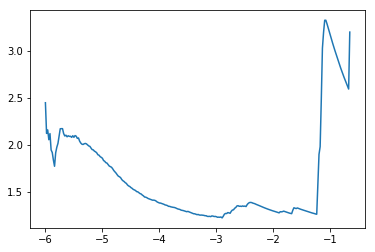

In [11]:
fig = plt.figure()
ax = plt.axes()
ax.plot(log_lrs, losses)

In [12]:
NUM_EPOCH = 20
TOTAL_ITER = NUM_EPOCH * len(train_labels)/BATCH_SIZE
LR_MAX = 5e-4
LR_RATIO = 32
lr = slanted_triangular_learning_rate(TOTAL_ITER, 1/NUM_EPOCH, LR_MAX, LR_RATIO)
for _ in range(NUM_EPOCH):
    my_trainer.train_step_classifier(train_chars, train_labels, BATCH_SIZE, lr, BPTT, [0, 200], fine_tune_rate=[RATIO, RATIO1, RATIO1, RATIO], folder_name=TRAIN_FOLDER)

Step    1: loss: 2.19013, acc: 0.23529, bptt:  64, time 04.18
Step    2: loss: 2.05621, acc: 0.35294, bptt:  64, time 04.45
Step    3: loss: 2.08218, acc: 0.23529, bptt:  64, time 04.83
Step    4: loss: 1.99346, acc: 0.29412, bptt:  64, time 05.34
Step    5: loss: 1.52539, acc: 0.52941, bptt:  67, time 05.59
Step    6: loss: 1.67461, acc: 0.23529, bptt:  60, time 05.77
Step    7: loss: 1.51188, acc: 0.41176, bptt:  75, time 05.95
Step    8: loss: 1.41373, acc: 0.29412, bptt:  76, time 06.32
Step    9: loss: 1.06881, acc: 0.64706, bptt:  63, time 06.62
Step   10: loss: 1.24315, acc: 0.35294, bptt:  30, time 07.16
Step   11: loss: 0.94856, acc: 0.58824, bptt:  71, time 07.43
Step   12: loss: 1.37692, acc: 0.23529, bptt:  66, time 07.70
Step   13: loss: 1.25077, acc: 0.29412, bptt:  65, time 08.29
Step   14: loss: 1.17542, acc: 0.29412, bptt:  70, time 08.47
Step   15: loss: 1.12888, acc: 0.41176, bptt:  72, time 08.72
Step   16: loss: 1.12821, acc: 0.41176, bptt:  70, time 08.99
Step   1

Step  134: loss: 0.90861, acc: 0.64706, bptt:  71, time 51.62
Step  135: loss: 1.07041, acc: 0.35294, bptt:  68, time 51.81
Step  136: loss: 0.96689, acc: 0.58824, bptt:  64, time 52.14
Step  137: loss: 0.97407, acc: 0.47059, bptt:  31, time 52.39
Step  138: loss: 0.91545, acc: 0.58824, bptt:  56, time 53.00
Step  139: loss: 0.90891, acc: 0.41176, bptt:  77, time 53.51
Step  140: loss: 0.98826, acc: 0.35294, bptt:  66, time 53.71
Step  141: loss: 0.92475, acc: 0.58824, bptt:  68, time 54.16
Step  142: loss: 1.03650, acc: 0.41176, bptt:  72, time 54.28
Step  143: loss: 0.79439, acc: 0.58824, bptt:  72, time 54.44
Step  144: loss: 1.15565, acc: 0.41176, bptt:  84, time 54.65
Step  145: loss: 1.04736, acc: 0.52941, bptt:  72, time 54.86
Step  146: loss: 0.96181, acc: 0.52941, bptt:  62, time 55.28
Step  147: loss: 0.98496, acc: 0.47059, bptt:  64, time 55.53
Step  148: loss: 0.94784, acc: 0.52941, bptt:  63, time 55.85
Step  149: loss: 1.15118, acc: 0.35294, bptt:  71, time 56.48
Step  15

Step  267: loss: 0.63762, acc: 0.76471, bptt:  66, time 99.34
Step  268: loss: 0.73287, acc: 0.64706, bptt:  75, time 99.62
Step  269: loss: 0.53220, acc: 0.76471, bptt:  76, time 99.95
Step  270: loss: 0.84874, acc: 0.52941, bptt:  63, time 100.20
Step  271: loss: 0.75102, acc: 0.58824, bptt:  70, time 100.60
Step  272: loss: 0.55737, acc: 0.88235, bptt:  71, time 100.96
Step  273: loss: 0.91354, acc: 0.70588, bptt:  76, time 101.37
Step  274: loss: 1.07071, acc: 0.47059, bptt:  30, time 101.56
Step  275: loss: 1.03388, acc: 0.47059, bptt:  66, time 102.13
Step  276: loss: 0.80601, acc: 0.58824, bptt:  72, time 102.48
Step  277: loss: 1.09545, acc: 0.35294, bptt:  65, time 102.76
Step  278: loss: 0.73615, acc: 0.76471, bptt:  61, time 103.04
Step  279: loss: 0.80955, acc: 0.64706, bptt:  74, time 103.45
Step  280: loss: 0.76212, acc: 0.64706, bptt:  65, time 103.70
Step  281: loss: 0.61969, acc: 0.64706, bptt:  69, time 104.15
Step  282: loss: 0.89373, acc: 0.41176, bptt:  65, time 10

Step  399: loss: 0.79579, acc: 0.70588, bptt:  70, time 34.77
Step  400: loss: 0.83452, acc: 0.58824, bptt:  74, time 34.99
Step  401: loss: 0.52836, acc: 0.88235, bptt:  75, time 35.17
Step  402: loss: 0.53074, acc: 0.70588, bptt:  69, time 35.44
Step  403: loss: 0.79244, acc: 0.70588, bptt:  71, time 35.83
Step  404: loss: 0.67219, acc: 0.64706, bptt:  72, time 36.15
Step  405: loss: 0.84618, acc: 0.58824, bptt:  72, time 36.35
Step  406: loss: 0.83551, acc: 0.64706, bptt:  73, time 36.63
Step  407: loss: 0.79747, acc: 0.64706, bptt:  71, time 37.03
Step  408: loss: 0.51343, acc: 0.70588, bptt:  78, time 37.35
Step  409: loss: 0.76041, acc: 0.64706, bptt:  70, time 37.69
Step  410: loss: 0.78433, acc: 0.64706, bptt:  72, time 38.08
Step  411: loss: 0.92118, acc: 0.52941, bptt:  71, time 38.41
Step  412: loss: 0.60431, acc: 0.76471, bptt:  78, time 38.83
Step  413: loss: 0.59510, acc: 0.88235, bptt:  59, time 39.31
Step  414: loss: 0.77277, acc: 0.58824, bptt:  62, time 39.59
Step  41

Step  532: loss: 0.67638, acc: 0.82353, bptt:  60, time 80.55
Step  533: loss: 0.70380, acc: 0.70588, bptt:  71, time 80.88
Step  534: loss: 0.77068, acc: 0.70588, bptt:  59, time 81.31
Step  535: loss: 0.49228, acc: 0.76471, bptt:  75, time 81.64
Step  536: loss: 0.82347, acc: 0.58824, bptt:  69, time 81.88
Step  537: loss: 0.72423, acc: 0.70588, bptt:  73, time 82.26
Step  538: loss: 1.31965, acc: 0.35294, bptt:  72, time 82.58
Step  539: loss: 0.97202, acc: 0.52941, bptt:  56, time 83.15
Step  540: loss: 0.64229, acc: 0.82353, bptt:  66, time 83.43
Step  541: loss: 0.68577, acc: 0.76471, bptt:  74, time 83.73
Step  542: loss: 1.07531, acc: 0.76471, bptt:  64, time 84.39
Step  543: loss: 0.97847, acc: 0.58824, bptt:  72, time 84.73
Step  544: loss: 0.66524, acc: 0.76471, bptt:  69, time 85.03
Step  545: loss: 0.88335, acc: 0.64706, bptt:  72, time 85.34
Step  546: loss: 1.06537, acc: 0.64706, bptt:  64, time 85.75
Step  547: loss: 0.47426, acc: 0.82353, bptt:  71, time 86.11
Step  54

Ignoring: 107_SA/checkpoints/tmp; No such file or directory
Step  601: loss: 0.41160, acc: 0.94118, bptt:  63, time 00.29
Step  602: loss: 0.48469, acc: 0.88235, bptt:  79, time 00.61
Step  603: loss: 0.65445, acc: 0.64706, bptt:  64, time 00.90
Step  604: loss: 0.59571, acc: 0.70588, bptt:  64, time 01.26
Step  605: loss: 1.26465, acc: 0.52941, bptt:  67, time 01.71
Step  606: loss: 0.92839, acc: 0.70588, bptt:  58, time 02.16
Step  607: loss: 0.53347, acc: 0.82353, bptt:  71, time 02.59
Step  608: loss: 0.67185, acc: 0.70588, bptt:  64, time 03.00
Step  609: loss: 0.83010, acc: 0.58824, bptt:  73, time 03.41
Step  610: loss: 0.85376, acc: 0.64706, bptt:  72, time 03.73
Step  611: loss: 1.02581, acc: 0.52941, bptt:  68, time 04.15
Step  612: loss: 0.54257, acc: 0.76471, bptt:  70, time 04.34
Step  613: loss: 0.65549, acc: 0.70588, bptt:  72, time 04.92
Step  614: loss: 0.63497, acc: 0.76471, bptt:  70, time 05.25
Step  615: loss: 0.78483, acc: 0.70588, bptt:  71, time 05.52
Step  616:

Step  733: loss: 0.76892, acc: 0.52941, bptt:  42, time 45.30
Step  734: loss: 0.29680, acc: 1.00000, bptt:  70, time 45.70
Step  735: loss: 0.67431, acc: 0.76471, bptt:  68, time 45.95
Step  736: loss: 0.55448, acc: 0.70588, bptt:  65, time 46.14
Step  737: loss: 0.69706, acc: 0.64706, bptt:  70, time 46.54
Step  738: loss: 0.40004, acc: 0.82353, bptt:  69, time 46.83
Step  739: loss: 0.66231, acc: 0.76471, bptt:  67, time 47.37
Step  740: loss: 0.74736, acc: 0.52941, bptt:  67, time 47.76
Step  741: loss: 0.58730, acc: 0.76471, bptt:  71, time 48.21
Step  742: loss: 0.44674, acc: 0.76471, bptt:  74, time 48.47
Step  743: loss: 0.61802, acc: 0.82353, bptt:  69, time 48.94
Step  744: loss: 0.98165, acc: 0.52941, bptt:  65, time 49.37
Step  745: loss: 0.51858, acc: 0.82353, bptt:  72, time 49.61
Step  746: loss: 0.66411, acc: 0.76471, bptt:  65, time 50.01
Step  747: loss: 1.14525, acc: 0.52941, bptt:  70, time 50.39
Step  748: loss: 1.13751, acc: 0.52941, bptt:  69, time 50.59
Step  74

Step  866: loss: 0.59736, acc: 0.70588, bptt:  67, time 91.60
Step  867: loss: 0.56241, acc: 0.70588, bptt:  67, time 91.94
Step  868: loss: 0.62983, acc: 0.76471, bptt:  71, time 92.26
Step  869: loss: 0.71418, acc: 0.64706, bptt:  69, time 92.74
Step  870: loss: 0.60030, acc: 0.64706, bptt:  66, time 93.33
Step  871: loss: 0.50083, acc: 0.70588, bptt:  32, time 93.63
Step  872: loss: 0.81518, acc: 0.52941, bptt:  77, time 94.37
Step  873: loss: 0.88090, acc: 0.70588, bptt:  75, time 94.71
Step  874: loss: 0.52481, acc: 0.76471, bptt:  71, time 95.04
Step  875: loss: 0.54866, acc: 0.82353, bptt:  67, time 95.49
Step  876: loss: 0.81759, acc: 0.52941, bptt:  65, time 95.84
Step  877: loss: 0.69037, acc: 0.58824, bptt:  77, time 96.29
Step  878: loss: 0.92978, acc: 0.58824, bptt:  72, time 96.60
Step  879: loss: 0.63726, acc: 0.76471, bptt:  66, time 96.92
Step  880: loss: 0.57485, acc: 0.70588, bptt:  71, time 97.38
Step  881: loss: 0.95237, acc: 0.58824, bptt:  63, time 97.85
Step  88

Step  998: loss: 0.43227, acc: 0.82353, bptt:  57, time 34.06
Step  999: loss: 0.88314, acc: 0.70588, bptt:  72, time 34.40
Step 1000: loss: 0.59399, acc: 0.76471, bptt:  70, time 34.80
Step 1001: loss: 0.32399, acc: 0.88235, bptt:  71, time 36.13
Step 1002: loss: 0.85803, acc: 0.70588, bptt:  65, time 36.50
Step 1003: loss: 0.84026, acc: 0.70588, bptt:  70, time 36.68
Step 1004: loss: 0.67799, acc: 0.82353, bptt:  60, time 36.94
Step 1005: loss: 0.27071, acc: 0.88235, bptt:  72, time 37.15
Step 1006: loss: 0.49111, acc: 0.82353, bptt:  69, time 37.51
Step 1007: loss: 0.82547, acc: 0.70588, bptt:  73, time 37.77
Step 1008: loss: 1.00509, acc: 0.52941, bptt:  74, time 38.11
Step 1009: loss: 0.33173, acc: 0.88235, bptt:  63, time 38.59
Step 1010: loss: 0.45791, acc: 0.82353, bptt:  38, time 39.02
Step 1011: loss: 0.29758, acc: 0.88235, bptt:  72, time 39.41
Step 1012: loss: 0.43958, acc: 0.82353, bptt:  71, time 39.82
Step 1013: loss: 0.56926, acc: 0.70588, bptt:  67, time 40.16
Step 101

Step 1131: loss: 0.72249, acc: 0.76471, bptt:  62, time 80.91
Step 1132: loss: 0.75275, acc: 0.70588, bptt:  76, time 81.46
Step 1133: loss: 0.71791, acc: 0.70588, bptt:  68, time 81.82
Step 1134: loss: 0.49326, acc: 0.76471, bptt:  76, time 82.16
Step 1135: loss: 0.54358, acc: 0.64706, bptt:  70, time 82.67
Step 1136: loss: 0.70599, acc: 0.82353, bptt:  76, time 82.94
Step 1137: loss: 0.87361, acc: 0.70588, bptt:  70, time 83.12
Step 1138: loss: 0.51656, acc: 0.82353, bptt:  61, time 83.61
Step 1139: loss: 0.41070, acc: 0.88235, bptt:  68, time 84.00
Step 1140: loss: 1.10937, acc: 0.64706, bptt:  70, time 84.37
Step 1141: loss: 0.57789, acc: 0.70588, bptt:  73, time 84.89
Step 1142: loss: 0.86491, acc: 0.70588, bptt:  68, time 85.09
Step 1143: loss: 0.61186, acc: 0.76471, bptt:  67, time 85.38
Step 1144: loss: 0.58608, acc: 0.70588, bptt:  60, time 85.62
Step 1145: loss: 0.56184, acc: 0.76471, bptt:  75, time 86.02
Step 1146: loss: 0.60791, acc: 0.76471, bptt:  37, time 86.89
Step 114

Step 1263: loss: 0.62204, acc: 0.70588, bptt:  78, time 21.53
Step 1264: loss: 0.28477, acc: 0.82353, bptt:  73, time 21.71
Step 1265: loss: 0.88347, acc: 0.64706, bptt:  75, time 21.97
Step 1266: loss: 0.52601, acc: 0.76471, bptt:  75, time 22.51
Step 1267: loss: 0.32017, acc: 0.88235, bptt:  77, time 22.79
Step 1268: loss: 0.59507, acc: 0.88235, bptt:  71, time 23.11
Step 1269: loss: 0.35362, acc: 0.76471, bptt:  74, time 23.46
Step 1270: loss: 0.54835, acc: 0.76471, bptt:  65, time 23.91
Step 1271: loss: 0.59038, acc: 0.64706, bptt:  74, time 24.27
Step 1272: loss: 0.36394, acc: 0.76471, bptt:  73, time 24.45
Step 1273: loss: 0.47736, acc: 0.76471, bptt:  73, time 24.80
Step 1274: loss: 0.21559, acc: 0.88235, bptt:  72, time 24.98
Step 1275: loss: 0.70306, acc: 0.70588, bptt:  69, time 25.37
Step 1276: loss: 0.33314, acc: 0.88235, bptt:  69, time 25.93
Step 1277: loss: 0.34197, acc: 0.88235, bptt:  69, time 26.45
Step 1278: loss: 0.34249, acc: 0.76471, bptt:  74, time 26.82
Step 127

Step 1396: loss: 0.58244, acc: 0.76471, bptt:  70, time 69.53
Step 1397: loss: 0.29138, acc: 0.94118, bptt:  37, time 69.86
Step 1398: loss: 0.44659, acc: 0.70588, bptt:  66, time 70.22
Step 1399: loss: 0.40510, acc: 0.82353, bptt:  26, time 70.58
Step 1400: loss: 0.28021, acc: 0.88235, bptt:  69, time 70.98
Step 1401: loss: 0.24309, acc: 0.88235, bptt:  73, time 71.43
Step 1402: loss: 0.31122, acc: 0.82353, bptt:  69, time 71.62
Step 1403: loss: 0.52793, acc: 0.76471, bptt:  65, time 71.80
Step 1404: loss: 0.58638, acc: 0.76471, bptt:  66, time 72.05
Step 1405: loss: 0.52391, acc: 0.76471, bptt:  67, time 72.38
Step 1406: loss: 0.46772, acc: 0.76471, bptt:  72, time 72.77
Step 1407: loss: 0.28748, acc: 0.94118, bptt:  80, time 73.09
Step 1408: loss: 0.69167, acc: 0.70588, bptt:  62, time 73.41
Step 1409: loss: 0.33840, acc: 0.82353, bptt:  29, time 73.75
Step 1410: loss: 0.57180, acc: 0.70588, bptt:  73, time 74.10
Step 1411: loss: 0.53424, acc: 0.76471, bptt:  30, time 74.49
Step 141

Step 1528: loss: 0.73069, acc: 0.64706, bptt:  70, time 09.59
Step 1529: loss: 0.33892, acc: 0.88235, bptt:  72, time 09.98
Step 1530: loss: 0.32253, acc: 0.88235, bptt:  78, time 10.25
Step 1531: loss: 0.16646, acc: 0.94118, bptt:  65, time 10.51
Step 1532: loss: 0.47554, acc: 0.76471, bptt:  63, time 11.04
Step 1533: loss: 0.69927, acc: 0.58824, bptt:  69, time 11.24
Step 1534: loss: 0.46101, acc: 0.82353, bptt:  68, time 11.55
Step 1535: loss: 0.08661, acc: 1.00000, bptt:  74, time 11.75
Step 1536: loss: 0.30673, acc: 0.88235, bptt:  67, time 12.17
Step 1537: loss: 0.77504, acc: 0.64706, bptt:  67, time 12.36
Step 1538: loss: 0.16820, acc: 0.94118, bptt:  70, time 12.73
Step 1539: loss: 0.21267, acc: 0.94118, bptt:  44, time 13.10
Step 1540: loss: 0.12053, acc: 1.00000, bptt:  72, time 13.38
Step 1541: loss: 0.19757, acc: 0.94118, bptt:  74, time 13.86
Step 1542: loss: 0.71873, acc: 0.76471, bptt:  70, time 14.20
Step 1543: loss: 0.16009, acc: 1.00000, bptt:  39, time 14.46
Step 154

Step 1661: loss: 0.31631, acc: 0.82353, bptt:  81, time 55.84
Step 1662: loss: 0.41423, acc: 0.82353, bptt:  72, time 56.30
Step 1663: loss: 0.43228, acc: 0.76471, bptt:  73, time 56.70
Step 1664: loss: 0.58157, acc: 0.82353, bptt:  66, time 57.19
Step 1665: loss: 0.42283, acc: 0.82353, bptt:  81, time 57.47
Step 1666: loss: 0.47130, acc: 0.82353, bptt:  71, time 58.00
Step 1667: loss: 0.16640, acc: 1.00000, bptt:  80, time 58.20
Step 1668: loss: 0.38338, acc: 0.88235, bptt:  72, time 58.54
Step 1669: loss: 0.35022, acc: 0.94118, bptt:  37, time 59.08
Step 1670: loss: 0.46952, acc: 0.88235, bptt:  71, time 59.47
Step 1671: loss: 0.29808, acc: 0.94118, bptt:  69, time 59.68
Step 1672: loss: 0.28750, acc: 0.88235, bptt:  66, time 59.92
Step 1673: loss: 0.47533, acc: 0.88235, bptt:  73, time 60.19
Step 1674: loss: 0.13654, acc: 1.00000, bptt:  75, time 60.40
Step 1675: loss: 0.30359, acc: 0.76471, bptt:  65, time 60.82
Step 1676: loss: 0.51548, acc: 0.82353, bptt:  67, time 61.10
Step 167

Step 1794: loss: 0.61556, acc: 0.82353, bptt:  65, time 100.45
Step 1795: loss: 0.33152, acc: 0.88235, bptt:  68, time 100.80
Step 1796: loss: 0.33104, acc: 0.94118, bptt:  76, time 101.16
Step 1797: loss: 0.55793, acc: 0.82353, bptt:  72, time 102.03
Step 1798: loss: 0.36159, acc: 0.82353, bptt:  70, time 102.88
Step 1799: loss: 0.46563, acc: 0.76471, bptt:  71, time 103.74
Step 1800: loss: 0.24312, acc: 0.88235, bptt:  27, time 104.75
Step 1801: loss: 0.18728, acc: 0.94118, bptt:  73, time 00.25
Step 1802: loss: 0.20561, acc: 0.94118, bptt:  79, time 00.59
Step 1803: loss: 0.25812, acc: 0.88235, bptt:  66, time 00.76
Step 1804: loss: 0.60654, acc: 0.82353, bptt:  62, time 01.01
Step 1805: loss: 0.39320, acc: 0.82353, bptt:  71, time 01.40
Step 1806: loss: 0.32407, acc: 0.82353, bptt:  72, time 01.73
Step 1807: loss: 0.13179, acc: 1.00000, bptt:  73, time 02.14
Step 1808: loss: 0.31005, acc: 0.88235, bptt:  72, time 02.67
Step 1809: loss: 0.39027, acc: 0.88235, bptt:  71, time 02.86
S

Step 1927: loss: 0.56049, acc: 0.70588, bptt:  76, time 43.52
Step 1928: loss: 0.58179, acc: 0.76471, bptt:  63, time 43.77
Step 1929: loss: 0.35148, acc: 0.82353, bptt:  64, time 44.12
Step 1930: loss: 0.32893, acc: 0.88235, bptt:  67, time 44.38
Step 1931: loss: 0.57263, acc: 0.82353, bptt:  69, time 44.84
Step 1932: loss: 0.48007, acc: 0.76471, bptt:  64, time 45.36
Step 1933: loss: 0.34893, acc: 0.88235, bptt:  61, time 45.83
Step 1934: loss: 0.71218, acc: 0.82353, bptt:  72, time 46.24
Step 1935: loss: 0.18873, acc: 0.88235, bptt:  73, time 46.50
Step 1936: loss: 0.43541, acc: 0.82353, bptt:  57, time 46.71
Step 1937: loss: 0.40752, acc: 0.82353, bptt:  81, time 47.23
Step 1938: loss: 0.52466, acc: 0.76471, bptt:  67, time 47.49
Step 1939: loss: 0.80380, acc: 0.64706, bptt:  64, time 47.80
Step 1940: loss: 0.85500, acc: 0.82353, bptt:  72, time 48.14
Step 1941: loss: 0.50321, acc: 0.76471, bptt:  69, time 48.59
Step 1942: loss: 0.30561, acc: 0.88235, bptt:  71, time 48.96
Step 194

Step 2060: loss: 0.13231, acc: 0.94118, bptt:  69, time 89.49
Step 2061: loss: 0.82984, acc: 0.70588, bptt:  34, time 89.80
Step 2062: loss: 0.12214, acc: 0.94118, bptt:  67, time 90.12
Step 2063: loss: 0.41463, acc: 0.76471, bptt:  69, time 90.48
Step 2064: loss: 0.46565, acc: 0.82353, bptt:  37, time 90.70
Step 2065: loss: 0.22779, acc: 0.88235, bptt:  71, time 91.22
Step 2066: loss: 0.49014, acc: 0.82353, bptt:  32, time 91.52
Step 2067: loss: 0.51485, acc: 0.76471, bptt:  71, time 91.78
Step 2068: loss: 0.22445, acc: 0.88235, bptt:  80, time 92.15
Step 2069: loss: 0.29436, acc: 0.88235, bptt:  71, time 92.40
Step 2070: loss: 0.19566, acc: 0.94118, bptt:  35, time 92.60
Step 2071: loss: 0.21815, acc: 0.94118, bptt:  66, time 92.93
Step 2072: loss: 0.28545, acc: 0.88235, bptt:  74, time 93.10
Step 2073: loss: 0.41243, acc: 0.82353, bptt:  65, time 93.46
Step 2074: loss: 0.31666, acc: 0.94118, bptt:  72, time 93.91
Step 2075: loss: 0.19242, acc: 0.94118, bptt:  70, time 94.29
Step 207

Step 2192: loss: 0.43498, acc: 0.82353, bptt:  76, time 31.71
Step 2193: loss: 0.29738, acc: 0.88235, bptt:  69, time 32.06
Step 2194: loss: 0.16188, acc: 1.00000, bptt:  76, time 32.40
Step 2195: loss: 0.27539, acc: 0.88235, bptt:  68, time 32.81
Step 2196: loss: 0.40115, acc: 0.82353, bptt:  70, time 33.09
Step 2197: loss: 0.22540, acc: 0.94118, bptt:  65, time 33.34
Step 2198: loss: 0.06583, acc: 1.00000, bptt:  80, time 33.78
Step 2199: loss: 0.17730, acc: 1.00000, bptt:  76, time 34.11
Step 2200: loss: 0.26784, acc: 0.94118, bptt:  66, time 34.53
Step 2201: loss: 0.47599, acc: 0.76471, bptt:  68, time 34.97
Step 2202: loss: 0.18669, acc: 0.94118, bptt:  66, time 35.20
Step 2203: loss: 0.12618, acc: 0.94118, bptt:  67, time 35.50
Step 2204: loss: 0.50842, acc: 0.88235, bptt:  76, time 35.87
Step 2205: loss: 0.27974, acc: 0.88235, bptt:  32, time 36.32
Step 2206: loss: 0.30577, acc: 0.82353, bptt:  76, time 36.61
Step 2207: loss: 0.11417, acc: 0.94118, bptt:  71, time 36.92
Step 220

Step 2325: loss: 0.69574, acc: 0.76471, bptt:  61, time 78.04
Step 2326: loss: 0.23554, acc: 0.82353, bptt:  74, time 78.35
Step 2327: loss: 0.43763, acc: 0.82353, bptt:  72, time 78.71
Step 2328: loss: 0.13888, acc: 0.94118, bptt:  74, time 79.26
Step 2329: loss: 0.18263, acc: 0.88235, bptt:  67, time 79.46
Step 2330: loss: 0.62118, acc: 0.76471, bptt:  65, time 79.72
Step 2331: loss: 0.21787, acc: 0.94118, bptt:  70, time 80.08
Step 2332: loss: 0.11578, acc: 1.00000, bptt:  77, time 80.35
Step 2333: loss: 0.43203, acc: 0.82353, bptt:  70, time 80.67
Step 2334: loss: 0.46834, acc: 0.76471, bptt:  69, time 80.86
Step 2335: loss: 0.47580, acc: 0.88235, bptt:  67, time 81.24
Step 2336: loss: 0.21131, acc: 0.94118, bptt:  73, time 81.51
Step 2337: loss: 0.26713, acc: 0.88235, bptt:  79, time 81.97
Step 2338: loss: 0.20503, acc: 0.88235, bptt:  68, time 82.38
Step 2339: loss: 0.28042, acc: 0.88235, bptt:  69, time 82.84
Step 2340: loss: 0.09675, acc: 0.94118, bptt:  70, time 83.15
Step 234

Step 2457: loss: 0.15141, acc: 0.94118, bptt:  70, time 20.07
Step 2458: loss: 0.17294, acc: 0.94118, bptt:  79, time 20.43
Step 2459: loss: 0.15245, acc: 0.88235, bptt:  65, time 20.74
Step 2460: loss: 0.14637, acc: 1.00000, bptt:  72, time 21.21
Step 2461: loss: 0.28931, acc: 0.88235, bptt:  79, time 21.73
Step 2462: loss: 0.70314, acc: 0.82353, bptt:  64, time 22.05
Step 2463: loss: 0.10709, acc: 0.94118, bptt:  29, time 22.53
Step 2464: loss: 0.12157, acc: 0.94118, bptt:  64, time 22.78
Step 2465: loss: 0.07472, acc: 0.94118, bptt:  62, time 23.27
Step 2466: loss: 0.02183, acc: 1.00000, bptt:  75, time 23.90
Step 2467: loss: 0.31819, acc: 0.88235, bptt:  65, time 24.38
Step 2468: loss: 0.21414, acc: 0.88235, bptt:  65, time 24.63
Step 2469: loss: 0.30394, acc: 0.88235, bptt:  77, time 24.97
Step 2470: loss: 0.26221, acc: 0.82353, bptt:  75, time 25.27
Step 2471: loss: 0.12718, acc: 0.94118, bptt:  70, time 25.61
Step 2472: loss: 0.34805, acc: 0.88235, bptt:  36, time 25.89
Step 247

Step 2590: loss: 0.31006, acc: 0.82353, bptt:  73, time 67.32
Step 2591: loss: 0.09865, acc: 0.94118, bptt:  62, time 67.51
Step 2592: loss: 0.27814, acc: 0.94118, bptt:  68, time 67.84
Step 2593: loss: 0.32443, acc: 0.82353, bptt:  70, time 68.11
Step 2594: loss: 0.33592, acc: 0.88235, bptt:  72, time 68.48
Step 2595: loss: 0.17604, acc: 0.94118, bptt:  67, time 68.90
Step 2596: loss: 0.09301, acc: 1.00000, bptt:  73, time 69.19
Step 2597: loss: 0.12287, acc: 0.94118, bptt:  68, time 69.46
Step 2598: loss: 0.64855, acc: 0.76471, bptt:  67, time 69.71
Step 2599: loss: 0.01236, acc: 1.00000, bptt:  65, time 69.86
Step 2600: loss: 0.09849, acc: 0.94118, bptt:  79, time 70.27
Step 2601: loss: 0.16066, acc: 0.94118, bptt:  71, time 70.48
Step 2602: loss: 0.46122, acc: 0.82353, bptt:  61, time 70.89
Step 2603: loss: 0.09976, acc: 0.94118, bptt:  62, time 71.11
Step 2604: loss: 0.02723, acc: 1.00000, bptt:  67, time 71.46
Step 2605: loss: 0.06698, acc: 1.00000, bptt:  69, time 71.71
Step 260

Step 2722: loss: 0.22915, acc: 0.88235, bptt:  73, time 09.71
Step 2723: loss: 0.14624, acc: 0.94118, bptt:  69, time 10.02
Step 2724: loss: 0.31392, acc: 0.88235, bptt:  71, time 10.28
Step 2725: loss: 0.24384, acc: 0.88235, bptt:  71, time 10.53
Step 2726: loss: 0.37579, acc: 0.82353, bptt:  72, time 11.05
Step 2727: loss: 0.40558, acc: 0.82353, bptt:  74, time 11.52
Step 2728: loss: 0.08941, acc: 1.00000, bptt:  77, time 11.79
Step 2729: loss: 0.52703, acc: 0.88235, bptt:  76, time 12.24
Step 2730: loss: 0.27544, acc: 0.88235, bptt:  61, time 12.48
Step 2731: loss: 0.10622, acc: 0.94118, bptt:  73, time 12.69
Step 2732: loss: 0.01660, acc: 1.00000, bptt:  59, time 13.17
Step 2733: loss: 0.15455, acc: 0.94118, bptt:  68, time 13.59
Step 2734: loss: 0.56896, acc: 0.88235, bptt:  68, time 13.77
Step 2735: loss: 0.11480, acc: 0.94118, bptt:  69, time 14.02
Step 2736: loss: 0.28973, acc: 0.94118, bptt:  71, time 14.35
Step 2737: loss: 0.09705, acc: 0.94118, bptt:  42, time 14.72
Step 273

Step 2855: loss: 0.28010, acc: 0.94118, bptt:  54, time 56.15
Step 2856: loss: 0.49310, acc: 0.82353, bptt:  75, time 56.49
Step 2857: loss: 0.22253, acc: 0.94118, bptt:  66, time 56.97
Step 2858: loss: 0.02665, acc: 1.00000, bptt:  74, time 57.25
Step 2859: loss: 0.19695, acc: 0.88235, bptt:  66, time 57.43
Step 2860: loss: 0.19756, acc: 0.94118, bptt:  75, time 57.64
Step 2861: loss: 0.24755, acc: 0.88235, bptt:  72, time 57.99
Step 2862: loss: 0.76335, acc: 0.88235, bptt:  71, time 58.38
Step 2863: loss: 0.13859, acc: 0.94118, bptt:  73, time 58.74
Step 2864: loss: 0.02353, acc: 1.00000, bptt:  60, time 59.08
Step 2865: loss: 0.25897, acc: 0.88235, bptt:  78, time 59.41
Step 2866: loss: 0.24442, acc: 0.82353, bptt:  64, time 59.71
Step 2867: loss: 0.09265, acc: 0.94118, bptt:  68, time 59.92
Step 2868: loss: 0.41756, acc: 0.82353, bptt:  58, time 60.32
Step 2869: loss: 0.24229, acc: 0.94118, bptt:  65, time 60.64
Step 2870: loss: 0.01920, acc: 1.00000, bptt:  71, time 60.98
Step 287

Step 2988: loss: 0.06214, acc: 1.00000, bptt:  31, time 102.21
Step 2989: loss: 0.18546, acc: 0.94118, bptt:  70, time 102.39
Step 2990: loss: 0.53688, acc: 0.88235, bptt:  81, time 102.88
Step 2991: loss: 0.03087, acc: 1.00000, bptt:  67, time 103.21
Step 2992: loss: 0.49098, acc: 0.82353, bptt:  71, time 103.51
Step 2993: loss: 0.30914, acc: 0.82353, bptt:  78, time 103.74
Step 2994: loss: 0.54600, acc: 0.76471, bptt:  72, time 103.99
Step 2995: loss: 0.33328, acc: 0.88235, bptt:  32, time 104.24
Step 2996: loss: 0.06652, acc: 1.00000, bptt:  67, time 104.69
Step 2997: loss: 0.10173, acc: 1.00000, bptt:  61, time 104.85
Step 2998: loss: 0.24810, acc: 0.88235, bptt:  79, time 105.06
Step 2999: loss: 0.20235, acc: 0.94118, bptt:  78, time 105.65
Step 3000: loss: 0.07862, acc: 1.00000, bptt:  63, time 105.97
Step 3001: loss: 0.15170, acc: 0.94118, bptt:  68, time 00.58
Step 3002: loss: 0.30991, acc: 0.88235, bptt:  69, time 00.80
Step 3003: loss: 0.03851, acc: 1.00000, bptt:  67, time 0

Step 3120: loss: 0.05262, acc: 1.00000, bptt:  69, time 40.05
Step 3121: loss: 0.05550, acc: 1.00000, bptt:  33, time 40.45
Step 3122: loss: 0.27129, acc: 0.94118, bptt:  66, time 40.76
Step 3123: loss: 0.09419, acc: 0.94118, bptt:  69, time 41.02
Step 3124: loss: 0.29523, acc: 0.88235, bptt:  38, time 41.49
Step 3125: loss: 0.42244, acc: 0.82353, bptt:  70, time 41.89
Step 3126: loss: 0.14971, acc: 0.94118, bptt:  36, time 42.18
Step 3127: loss: 0.35278, acc: 0.94118, bptt:  77, time 42.67
Step 3128: loss: 0.26046, acc: 0.94118, bptt:  67, time 42.92
Step 3129: loss: 0.66447, acc: 0.82353, bptt:  80, time 43.26
Step 3130: loss: 0.01833, acc: 1.00000, bptt:  66, time 43.50
Step 3131: loss: 0.41934, acc: 0.88235, bptt:  36, time 43.72
Step 3132: loss: 0.49921, acc: 0.82353, bptt:  70, time 44.16
Step 3133: loss: 0.24629, acc: 0.88235, bptt:  75, time 44.55
Step 3134: loss: 0.24830, acc: 0.94118, bptt:  75, time 44.91
Step 3135: loss: 0.22137, acc: 0.88235, bptt:  73, time 45.20
Step 313

Step 3253: loss: 0.08256, acc: 1.00000, bptt:  65, time 86.62
Step 3254: loss: 0.04598, acc: 0.94118, bptt:  76, time 86.78
Step 3255: loss: 0.22591, acc: 0.88235, bptt:  74, time 87.32
Step 3256: loss: 0.07301, acc: 1.00000, bptt:  70, time 87.70
Step 3257: loss: 0.01696, acc: 1.00000, bptt:  64, time 87.92
Step 3258: loss: 0.06170, acc: 1.00000, bptt:  62, time 88.28
Step 3259: loss: 0.05976, acc: 1.00000, bptt:  70, time 88.65
Step 3260: loss: 0.34526, acc: 0.76471, bptt:  71, time 89.11
Step 3261: loss: 0.22798, acc: 0.88235, bptt:  67, time 89.27
Step 3262: loss: 0.15767, acc: 0.94118, bptt:  68, time 89.54
Step 3263: loss: 0.17349, acc: 0.94118, bptt:  65, time 90.02
Step 3264: loss: 0.10872, acc: 0.94118, bptt:  78, time 90.22
Step 3265: loss: 0.06828, acc: 0.94118, bptt:  69, time 90.45
Step 3266: loss: 0.09877, acc: 1.00000, bptt:  75, time 90.66
Step 3267: loss: 0.14902, acc: 0.94118, bptt:  82, time 91.09
Step 3268: loss: 0.39929, acc: 0.88235, bptt:  60, time 91.33
Step 326

Step 3386: loss: 0.23212, acc: 0.88235, bptt:  69, time 29.89
Step 3387: loss: 0.06091, acc: 1.00000, bptt:  74, time 30.23
Step 3388: loss: 0.13690, acc: 0.94118, bptt:  68, time 30.51
Step 3389: loss: 0.07047, acc: 1.00000, bptt:  69, time 30.81
Step 3390: loss: 0.03969, acc: 1.00000, bptt:  67, time 31.12
Step 3391: loss: 0.34060, acc: 0.94118, bptt:  71, time 31.45
Step 3392: loss: 0.08666, acc: 0.94118, bptt:  71, time 31.81
Step 3393: loss: 0.03527, acc: 1.00000, bptt:  64, time 32.06
Step 3394: loss: 0.00725, acc: 1.00000, bptt:  66, time 32.57
Step 3395: loss: 0.31635, acc: 0.88235, bptt:  68, time 33.00
Step 3396: loss: 0.30862, acc: 0.88235, bptt:  76, time 33.42
Step 3397: loss: 0.62111, acc: 0.70588, bptt:  69, time 33.63
Step 3398: loss: 0.14029, acc: 0.94118, bptt:  71, time 33.87
Step 3399: loss: 0.06279, acc: 1.00000, bptt:  65, time 34.20
Step 3400: loss: 0.04054, acc: 1.00000, bptt:  66, time 34.57
Step 3401: loss: 0.17157, acc: 0.94118, bptt:  74, time 34.88
Step 340

Step 3519: loss: 0.04367, acc: 1.00000, bptt:  68, time 74.90
Step 3520: loss: 0.32979, acc: 0.88235, bptt:  28, time 75.34
Step 3521: loss: 0.05084, acc: 1.00000, bptt:  77, time 75.81
Step 3522: loss: 0.20149, acc: 0.94118, bptt:  63, time 76.23
Step 3523: loss: 0.04578, acc: 0.94118, bptt:  65, time 76.41
Step 3524: loss: 0.12549, acc: 0.94118, bptt:  73, time 76.74
Step 3525: loss: 0.04564, acc: 1.00000, bptt:  73, time 77.18
Step 3526: loss: 0.00543, acc: 1.00000, bptt:  63, time 77.53
Step 3527: loss: 0.40888, acc: 0.82353, bptt:  70, time 78.04
Step 3528: loss: 0.01628, acc: 1.00000, bptt:  71, time 78.50
Step 3529: loss: 0.18879, acc: 0.94118, bptt:  61, time 78.74
Step 3530: loss: 0.04151, acc: 1.00000, bptt:  64, time 79.14
Step 3531: loss: 0.21679, acc: 0.94118, bptt:  64, time 79.65
Step 3532: loss: 0.08744, acc: 1.00000, bptt:  69, time 79.88
Step 3533: loss: 0.32565, acc: 0.88235, bptt:  72, time 80.18
Step 3534: loss: 0.00639, acc: 1.00000, bptt:  71, time 80.50
Step 353

Step 3652: loss: 0.08999, acc: 0.94118, bptt:  58, time 19.18
Step 3653: loss: 0.14333, acc: 0.94118, bptt:  75, time 19.45
Step 3654: loss: 0.12738, acc: 0.94118, bptt:  74, time 19.74
Step 3655: loss: 0.23549, acc: 0.94118, bptt:  68, time 20.20
Step 3656: loss: 0.02131, acc: 1.00000, bptt:  67, time 20.57
Step 3657: loss: 0.04769, acc: 1.00000, bptt:  65, time 21.01
Step 3658: loss: 0.04509, acc: 1.00000, bptt:  64, time 21.30
Step 3659: loss: 0.01500, acc: 1.00000, bptt:  80, time 21.69
Step 3660: loss: 0.04531, acc: 1.00000, bptt:  69, time 22.06
Step 3661: loss: 0.05834, acc: 1.00000, bptt:  70, time 22.52
Step 3662: loss: 0.03620, acc: 1.00000, bptt:  77, time 22.78
Step 3663: loss: 0.06872, acc: 0.94118, bptt:  68, time 23.05
Step 3664: loss: 0.11469, acc: 0.88235, bptt:  67, time 23.36
Step 3665: loss: 0.35421, acc: 0.94118, bptt:  67, time 23.81
Step 3666: loss: 0.04304, acc: 1.00000, bptt:  78, time 24.15
Step 3667: loss: 0.51195, acc: 0.70588, bptt:  74, time 24.50
Step 366

Step 3785: loss: 0.05564, acc: 0.94118, bptt:  77, time 65.26
Step 3786: loss: 0.09409, acc: 0.94118, bptt:  63, time 65.54
Step 3787: loss: 0.07151, acc: 1.00000, bptt:  67, time 65.80
Step 3788: loss: 0.11087, acc: 0.94118, bptt:  60, time 66.08
Step 3789: loss: 0.11404, acc: 0.94118, bptt:  70, time 66.61
Step 3790: loss: 0.21859, acc: 0.94118, bptt:  72, time 66.88
Step 3791: loss: 0.22655, acc: 0.94118, bptt:  66, time 67.31
Step 3792: loss: 0.37391, acc: 0.82353, bptt:  66, time 67.63
Step 3793: loss: 0.06878, acc: 0.94118, bptt:  64, time 68.11
Step 3794: loss: 0.01002, acc: 1.00000, bptt:  64, time 68.26
Step 3795: loss: 0.12456, acc: 0.94118, bptt:  76, time 68.61
Step 3796: loss: 0.34931, acc: 0.88235, bptt:  68, time 69.04
Step 3797: loss: 0.00832, acc: 1.00000, bptt:  66, time 69.27
Step 3798: loss: 0.14847, acc: 0.94118, bptt:  67, time 69.53
Step 3799: loss: 0.08762, acc: 0.94118, bptt:  68, time 69.82
Step 3800: loss: 0.08719, acc: 0.94118, bptt:  70, time 70.25
Step 380

Step 3917: loss: 0.03614, acc: 1.00000, bptt:  69, time 06.17
Step 3918: loss: 0.14289, acc: 0.94118, bptt:  71, time 06.42
Step 3919: loss: 0.39303, acc: 0.94118, bptt:  70, time 06.87
Step 3920: loss: 0.00933, acc: 1.00000, bptt:  69, time 07.25
Step 3921: loss: 0.05428, acc: 0.94118, bptt:  70, time 07.51
Step 3922: loss: 0.00784, acc: 1.00000, bptt:  35, time 08.01
Step 3923: loss: 0.23411, acc: 0.94118, bptt:  72, time 08.37
Step 3924: loss: 0.02926, acc: 1.00000, bptt:  58, time 08.85
Step 3925: loss: 0.38190, acc: 0.88235, bptt:  61, time 09.30
Step 3926: loss: 0.00479, acc: 1.00000, bptt:  65, time 09.49
Step 3927: loss: 0.06400, acc: 1.00000, bptt:  71, time 09.96
Step 3928: loss: 0.00656, acc: 1.00000, bptt:  69, time 10.29
Step 3929: loss: 0.00524, acc: 1.00000, bptt:  75, time 10.50
Step 3930: loss: 0.00796, acc: 1.00000, bptt:  69, time 10.95
Step 3931: loss: 0.09969, acc: 0.94118, bptt:  72, time 11.31
Step 3932: loss: 0.03526, acc: 1.00000, bptt:  69, time 11.50
Step 393

Step 4050: loss: 0.02867, acc: 1.00000, bptt:  74, time 53.11
Step 4051: loss: 0.05850, acc: 1.00000, bptt:  65, time 53.30
Step 4052: loss: 0.00775, acc: 1.00000, bptt:  72, time 53.86
Step 4053: loss: 0.08928, acc: 0.94118, bptt:  76, time 54.29
Step 4054: loss: 0.01105, acc: 1.00000, bptt:  71, time 54.46
Step 4055: loss: 0.07847, acc: 0.94118, bptt:  71, time 54.74
Step 4056: loss: 0.12637, acc: 0.94118, bptt:  65, time 55.04
Step 4057: loss: 0.21576, acc: 0.94118, bptt:  67, time 55.31
Step 4058: loss: 0.01966, acc: 1.00000, bptt:  64, time 55.79
Step 4059: loss: 0.16374, acc: 0.94118, bptt:  74, time 56.35
Step 4060: loss: 0.08720, acc: 0.94118, bptt:  70, time 56.66
Step 4061: loss: 0.24127, acc: 0.88235, bptt:  73, time 56.86
Step 4062: loss: 0.06491, acc: 1.00000, bptt:  73, time 57.32
Step 4063: loss: 0.11463, acc: 0.94118, bptt:  65, time 57.57
Step 4064: loss: 0.04767, acc: 1.00000, bptt:  78, time 57.85
Step 4065: loss: 0.11160, acc: 0.94118, bptt:  68, time 58.18
Step 406

Step 4183: loss: 0.02836, acc: 1.00000, bptt:  73, time 96.98
Step 4184: loss: 0.05455, acc: 1.00000, bptt:  67, time 97.51
Step 4185: loss: 0.01853, acc: 1.00000, bptt:  70, time 97.88
Step 4186: loss: 0.02883, acc: 1.00000, bptt:  63, time 98.13
Step 4187: loss: 0.00239, acc: 1.00000, bptt:  78, time 98.67
Step 4188: loss: 0.03234, acc: 1.00000, bptt:  69, time 99.09
Step 4189: loss: 0.16271, acc: 0.94118, bptt:  80, time 99.52
Step 4190: loss: 0.32911, acc: 0.88235, bptt:  63, time 99.78
Step 4191: loss: 0.06225, acc: 1.00000, bptt:  35, time 100.06
Step 4192: loss: 0.02303, acc: 1.00000, bptt:  75, time 100.34
Step 4193: loss: 0.35758, acc: 0.94118, bptt:  26, time 100.78
Step 4194: loss: 0.09168, acc: 0.94118, bptt:  76, time 100.99
Step 4195: loss: 0.17213, acc: 0.88235, bptt:  78, time 101.40
Step 4196: loss: 0.31397, acc: 0.94118, bptt:  69, time 101.77
Step 4197: loss: 0.08499, acc: 0.94118, bptt:  78, time 102.60
Step 4198: loss: 0.13919, acc: 0.94118, bptt:  67, time 103.44


Step 4315: loss: 0.03873, acc: 1.00000, bptt:  69, time 40.21
Step 4316: loss: 0.00616, acc: 1.00000, bptt:  71, time 40.42
Step 4317: loss: 0.02160, acc: 1.00000, bptt:  73, time 40.68
Step 4318: loss: 0.00493, acc: 1.00000, bptt:  64, time 40.96
Step 4319: loss: 0.46485, acc: 0.94118, bptt:  78, time 41.16
Step 4320: loss: 0.32548, acc: 0.94118, bptt:  76, time 41.82
Step 4321: loss: 0.03183, acc: 1.00000, bptt:  34, time 42.23
Step 4322: loss: 0.15467, acc: 0.94118, bptt:  67, time 42.57
Step 4323: loss: 0.04662, acc: 1.00000, bptt:  70, time 42.78
Step 4324: loss: 0.13992, acc: 0.94118, bptt:  66, time 43.21
Step 4325: loss: 0.00797, acc: 1.00000, bptt:  71, time 43.54
Step 4326: loss: 0.06640, acc: 0.94118, bptt:  68, time 44.06
Step 4327: loss: 0.06693, acc: 0.94118, bptt:  61, time 44.49
Step 4328: loss: 0.03930, acc: 1.00000, bptt:  62, time 44.78
Step 4329: loss: 0.01164, acc: 1.00000, bptt:  67, time 45.24
Step 4330: loss: 0.38877, acc: 0.88235, bptt:  62, time 45.58
Step 433

Step 4448: loss: 0.00066, acc: 1.00000, bptt:  71, time 87.39
Step 4449: loss: 0.02921, acc: 1.00000, bptt:  67, time 87.86
Step 4450: loss: 0.03114, acc: 1.00000, bptt:  77, time 88.13
Step 4451: loss: 0.01184, acc: 1.00000, bptt:  69, time 88.37
Step 4452: loss: 0.42592, acc: 0.88235, bptt:  68, time 88.63
Step 4453: loss: 0.15522, acc: 0.94118, bptt:  65, time 89.14
Step 4454: loss: 0.04960, acc: 0.94118, bptt:  73, time 89.50
Step 4455: loss: 0.07858, acc: 0.94118, bptt:  74, time 89.91
Step 4456: loss: 0.00186, acc: 1.00000, bptt:  73, time 90.23
Step 4457: loss: 0.08942, acc: 0.94118, bptt:  27, time 90.56
Step 4458: loss: 0.03677, acc: 1.00000, bptt:  67, time 90.77
Step 4459: loss: 0.02388, acc: 1.00000, bptt:  63, time 91.36
Step 4460: loss: 0.25995, acc: 0.94118, bptt:  59, time 91.96
Step 4461: loss: 0.20442, acc: 0.94118, bptt:  71, time 92.24
Step 4462: loss: 0.00334, acc: 1.00000, bptt:  59, time 92.62
Step 4463: loss: 0.07148, acc: 0.94118, bptt:  67, time 92.98
Step 446

Step 4580: loss: 0.02310, acc: 1.00000, bptt:  73, time 27.56
Step 4581: loss: 0.02129, acc: 1.00000, bptt:  80, time 27.77
Step 4582: loss: 0.00110, acc: 1.00000, bptt:  73, time 28.10
Step 4583: loss: 0.02963, acc: 1.00000, bptt:  72, time 28.38
Step 4584: loss: 0.01455, acc: 1.00000, bptt:  27, time 28.89
Step 4585: loss: 0.01396, acc: 1.00000, bptt:  75, time 29.22
Step 4586: loss: 0.02778, acc: 1.00000, bptt:  70, time 29.63
Step 4587: loss: 0.50299, acc: 0.88235, bptt:  67, time 30.06
Step 4588: loss: 0.02731, acc: 1.00000, bptt:  69, time 30.62
Step 4589: loss: 0.01612, acc: 1.00000, bptt:  66, time 31.01
Step 4590: loss: 0.00937, acc: 1.00000, bptt:  65, time 31.26
Step 4591: loss: 0.02308, acc: 1.00000, bptt:  72, time 31.51
Step 4592: loss: 0.02106, acc: 1.00000, bptt:  75, time 31.89
Step 4593: loss: 0.04973, acc: 1.00000, bptt:  68, time 32.23
Step 4594: loss: 0.06060, acc: 0.94118, bptt:  58, time 32.66
Step 4595: loss: 0.01742, acc: 1.00000, bptt:  69, time 32.99
Step 459

Step 4713: loss: 0.03898, acc: 1.00000, bptt:  61, time 72.68
Step 4714: loss: 0.00202, acc: 1.00000, bptt:  63, time 73.02
Step 4715: loss: 0.03270, acc: 1.00000, bptt:  63, time 73.27
Step 4716: loss: 0.03349, acc: 1.00000, bptt:  66, time 73.62
Step 4717: loss: 0.02316, acc: 1.00000, bptt:  70, time 73.95
Step 4718: loss: 0.00590, acc: 1.00000, bptt:  64, time 74.27
Step 4719: loss: 0.14283, acc: 0.94118, bptt:  73, time 74.67
Step 4720: loss: 0.00777, acc: 1.00000, bptt:  74, time 75.03
Step 4721: loss: 0.15304, acc: 0.88235, bptt:  67, time 75.34
Step 4722: loss: 0.00965, acc: 1.00000, bptt:  61, time 75.77
Step 4723: loss: 0.01254, acc: 1.00000, bptt:  66, time 76.15
Step 4724: loss: 0.11725, acc: 0.94118, bptt:  69, time 76.36
Step 4725: loss: 0.01943, acc: 1.00000, bptt:  73, time 76.88
Step 4726: loss: 0.02784, acc: 1.00000, bptt:  69, time 77.40
Step 4727: loss: 0.10227, acc: 0.94118, bptt:  68, time 77.60
Step 4728: loss: 0.08080, acc: 0.94118, bptt:  68, time 77.95
Step 472

Step 4845: loss: 0.04484, acc: 1.00000, bptt:  68, time 17.76
Step 4846: loss: 0.24710, acc: 0.88235, bptt:  60, time 18.09
Step 4847: loss: 0.11559, acc: 0.94118, bptt:  71, time 18.47
Step 4848: loss: 0.02664, acc: 1.00000, bptt:  67, time 18.75
Step 4849: loss: 0.12112, acc: 0.94118, bptt:  67, time 19.00
Step 4850: loss: 0.02107, acc: 1.00000, bptt:  68, time 19.24
Step 4851: loss: 0.00175, acc: 1.00000, bptt:  75, time 19.57
Step 4852: loss: 0.00453, acc: 1.00000, bptt:  67, time 20.11
Step 4853: loss: 0.33777, acc: 0.88235, bptt:  70, time 20.30
Step 4854: loss: 0.04586, acc: 0.94118, bptt:  74, time 20.74
Step 4855: loss: 0.07795, acc: 0.94118, bptt:  64, time 21.08
Step 4856: loss: 0.01219, acc: 1.00000, bptt:  70, time 21.29
Step 4857: loss: 0.29025, acc: 0.94118, bptt:  68, time 21.54
Step 4858: loss: 0.03234, acc: 1.00000, bptt:  74, time 22.02
Step 4859: loss: 0.29391, acc: 0.82353, bptt:  62, time 22.34
Step 4860: loss: 0.19837, acc: 0.94118, bptt:  83, time 22.89
Step 486

Step 4978: loss: 0.00406, acc: 1.00000, bptt:  73, time 62.15
Step 4979: loss: 0.05853, acc: 0.94118, bptt:  73, time 62.38
Step 4980: loss: 0.06202, acc: 1.00000, bptt:  64, time 62.85
Step 4981: loss: 0.01078, acc: 1.00000, bptt:  32, time 63.11
Step 4982: loss: 0.04436, acc: 1.00000, bptt:  66, time 63.46
Step 4983: loss: 0.00975, acc: 1.00000, bptt:  75, time 63.74
Step 4984: loss: 0.02347, acc: 1.00000, bptt:  76, time 63.95
Step 4985: loss: 0.00185, acc: 1.00000, bptt:  71, time 64.40
Step 4986: loss: 0.13727, acc: 0.88235, bptt:  72, time 64.61
Step 4987: loss: 0.25880, acc: 0.94118, bptt:  63, time 64.87
Step 4988: loss: 0.14484, acc: 0.94118, bptt:  63, time 65.32
Step 4989: loss: 0.03833, acc: 1.00000, bptt:  75, time 65.63
Step 4990: loss: 0.06533, acc: 1.00000, bptt:  78, time 66.00
Step 4991: loss: 0.01429, acc: 1.00000, bptt:  69, time 66.26
Step 4992: loss: 0.18941, acc: 0.88235, bptt:  51, time 66.81
Step 4993: loss: 0.04754, acc: 1.00000, bptt:  70, time 67.12
Step 499

Step 5110: loss: 0.03184, acc: 1.00000, bptt:  60, time 05.84
Step 5111: loss: 0.06930, acc: 0.94118, bptt:  75, time 06.22
Step 5112: loss: 0.04987, acc: 1.00000, bptt:  68, time 06.45
Step 5113: loss: 0.02239, acc: 1.00000, bptt:  67, time 06.71
Step 5114: loss: 0.00156, acc: 1.00000, bptt:  67, time 07.24
Step 5115: loss: 0.01564, acc: 1.00000, bptt:  67, time 07.68
Step 5116: loss: 0.00493, acc: 1.00000, bptt:  67, time 08.02
Step 5117: loss: 0.09837, acc: 0.94118, bptt:  69, time 08.36
Step 5118: loss: 0.04345, acc: 1.00000, bptt:  75, time 08.73
Step 5119: loss: 0.06732, acc: 0.94118, bptt:  74, time 08.93
Step 5120: loss: 0.02924, acc: 1.00000, bptt:  71, time 09.23
Step 5121: loss: 0.00186, acc: 1.00000, bptt:  69, time 09.52
Step 5122: loss: 0.07968, acc: 0.94118, bptt:  70, time 10.00
Step 5123: loss: 0.02403, acc: 1.00000, bptt:  66, time 10.53
Step 5124: loss: 0.01509, acc: 1.00000, bptt:  55, time 10.78
Step 5125: loss: 0.09241, acc: 0.94118, bptt:  71, time 11.03
Step 512

Step 5243: loss: 0.00421, acc: 1.00000, bptt:  68, time 50.53
Step 5244: loss: 0.00064, acc: 1.00000, bptt:  28, time 51.12
Step 5245: loss: 0.01594, acc: 1.00000, bptt:  73, time 51.47
Step 5246: loss: 0.00153, acc: 1.00000, bptt:  79, time 51.87
Step 5247: loss: 0.00714, acc: 1.00000, bptt:  67, time 52.21
Step 5248: loss: 0.00063, acc: 1.00000, bptt:  67, time 52.53
Step 5249: loss: 0.27792, acc: 0.94118, bptt:  67, time 52.87
Step 5250: loss: 0.00079, acc: 1.00000, bptt:  73, time 53.25
Step 5251: loss: 0.02007, acc: 1.00000, bptt:  66, time 53.62
Step 5252: loss: 0.37852, acc: 0.82353, bptt:  72, time 53.97
Step 5253: loss: 0.03003, acc: 1.00000, bptt:  66, time 54.31
Step 5254: loss: 0.00363, acc: 1.00000, bptt:  73, time 54.53
Step 5255: loss: 0.07632, acc: 0.94118, bptt:  76, time 54.82
Step 5256: loss: 0.00203, acc: 1.00000, bptt:  32, time 55.42
Step 5257: loss: 0.01927, acc: 1.00000, bptt:  71, time 55.68
Step 5258: loss: 0.01894, acc: 1.00000, bptt:  63, time 56.17
Step 525

Step 5376: loss: 0.00492, acc: 1.00000, bptt:  70, time 95.59
Step 5377: loss: 0.01833, acc: 1.00000, bptt:  71, time 95.94
Step 5378: loss: 0.06737, acc: 0.94118, bptt:  69, time 96.30
Step 5379: loss: 0.18158, acc: 0.94118, bptt:  68, time 96.61
Step 5380: loss: 0.01854, acc: 1.00000, bptt:  64, time 96.95
Step 5381: loss: 0.00192, acc: 1.00000, bptt:  62, time 97.26
Step 5382: loss: 0.01901, acc: 1.00000, bptt:  78, time 97.58
Step 5383: loss: 0.29761, acc: 0.88235, bptt:  68, time 97.88
Step 5384: loss: 0.01239, acc: 1.00000, bptt:  72, time 98.20
Step 5385: loss: 0.24499, acc: 0.94118, bptt:  57, time 98.64
Step 5386: loss: 0.12274, acc: 0.94118, bptt:  72, time 99.15
Step 5387: loss: 0.08769, acc: 0.94118, bptt:  76, time 99.37
Step 5388: loss: 0.00201, acc: 1.00000, bptt:  71, time 99.77
Step 5389: loss: 0.02037, acc: 1.00000, bptt:  66, time 99.96
Step 5390: loss: 0.00133, acc: 1.00000, bptt:  67, time 100.29
Step 5391: loss: 0.10442, acc: 0.94118, bptt:  65, time 100.87
Step 5

Step 5508: loss: 0.02343, acc: 1.00000, bptt:  73, time 39.23
Step 5509: loss: 0.01029, acc: 1.00000, bptt:  72, time 39.79
Step 5510: loss: 0.01091, acc: 1.00000, bptt:  70, time 40.16
Step 5511: loss: 0.03585, acc: 1.00000, bptt:  70, time 40.33
Step 5512: loss: 0.08412, acc: 0.94118, bptt:  44, time 40.92
Step 5513: loss: 0.01940, acc: 1.00000, bptt:  70, time 41.35
Step 5514: loss: 0.04656, acc: 0.94118, bptt:  22, time 41.78
Step 5515: loss: 0.00036, acc: 1.00000, bptt:  71, time 42.08
Step 5516: loss: 0.00884, acc: 1.00000, bptt:  62, time 42.33
Step 5517: loss: 0.16945, acc: 0.88235, bptt:  75, time 42.66
Step 5518: loss: 0.20400, acc: 0.88235, bptt:  65, time 42.91
Step 5519: loss: 0.00172, acc: 1.00000, bptt:  72, time 43.29
Step 5520: loss: 0.02294, acc: 1.00000, bptt:  65, time 43.53
Step 5521: loss: 0.00656, acc: 1.00000, bptt:  39, time 43.97
Step 5522: loss: 0.03127, acc: 1.00000, bptt:  71, time 44.31
Step 5523: loss: 0.21388, acc: 0.88235, bptt:  65, time 44.47
Step 552

Step 5641: loss: 0.06208, acc: 1.00000, bptt:  35, time 83.84
Step 5642: loss: 0.07034, acc: 0.94118, bptt:  71, time 84.20
Step 5643: loss: 0.06079, acc: 0.94118, bptt:  70, time 84.57
Step 5644: loss: 0.01132, acc: 1.00000, bptt:  71, time 85.12
Step 5645: loss: 0.06465, acc: 0.94118, bptt:  63, time 85.47
Step 5646: loss: 0.00559, acc: 1.00000, bptt:  66, time 85.79
Step 5647: loss: 0.00319, acc: 1.00000, bptt:  67, time 86.21
Step 5648: loss: 0.00262, acc: 1.00000, bptt:  62, time 86.40
Step 5649: loss: 0.00482, acc: 1.00000, bptt:  72, time 86.67
Step 5650: loss: 0.59451, acc: 0.94118, bptt:  67, time 87.05
Step 5651: loss: 0.00409, acc: 1.00000, bptt:  72, time 87.34
Step 5652: loss: 0.10649, acc: 0.94118, bptt:  75, time 87.90
Step 5653: loss: 0.10245, acc: 0.94118, bptt:  69, time 88.07
Step 5654: loss: 0.05637, acc: 1.00000, bptt:  39, time 88.44
Step 5655: loss: 0.04944, acc: 1.00000, bptt:  67, time 88.75
Step 5656: loss: 0.05948, acc: 0.94118, bptt:  70, time 89.03
Step 565

Step 5773: loss: 0.00480, acc: 1.00000, bptt:  70, time 23.77
Step 5774: loss: 0.08723, acc: 0.94118, bptt:  76, time 24.27
Step 5775: loss: 0.00083, acc: 1.00000, bptt:  34, time 24.53
Step 5776: loss: 0.00054, acc: 1.00000, bptt:  74, time 24.79
Step 5777: loss: 0.00239, acc: 1.00000, bptt:  83, time 25.25
Step 5778: loss: 0.02311, acc: 1.00000, bptt:  69, time 25.42
Step 5779: loss: 0.05644, acc: 0.94118, bptt:  73, time 25.73
Step 5780: loss: 0.72283, acc: 0.88235, bptt:  60, time 26.03
Step 5781: loss: 0.43276, acc: 0.94118, bptt:  78, time 26.46
Step 5782: loss: 0.03715, acc: 1.00000, bptt:  73, time 26.79
Step 5783: loss: 0.00422, acc: 1.00000, bptt:  41, time 27.02
Step 5784: loss: 0.00907, acc: 1.00000, bptt:  64, time 27.25
Step 5785: loss: 0.00261, acc: 1.00000, bptt:  68, time 27.54
Step 5786: loss: 0.00049, acc: 1.00000, bptt:  68, time 27.82
Step 5787: loss: 0.12416, acc: 0.94118, bptt:  65, time 28.13
Step 5788: loss: 0.04514, acc: 1.00000, bptt:  74, time 28.49
Step 578

Step 5906: loss: 0.07892, acc: 0.94118, bptt:  72, time 70.45
Step 5907: loss: 0.02529, acc: 1.00000, bptt:  68, time 70.69
Step 5908: loss: 0.06700, acc: 0.94118, bptt:  76, time 71.06
Step 5909: loss: 0.00118, acc: 1.00000, bptt:  73, time 71.35
Step 5910: loss: 0.00475, acc: 1.00000, bptt:  65, time 71.61
Step 5911: loss: 0.00751, acc: 1.00000, bptt:  68, time 71.88
Step 5912: loss: 0.03458, acc: 1.00000, bptt:  70, time 72.16
Step 5913: loss: 0.16504, acc: 0.94118, bptt:  74, time 72.36
Step 5914: loss: 0.00004, acc: 1.00000, bptt:  74, time 72.68
Step 5915: loss: 0.06266, acc: 1.00000, bptt:  65, time 72.91
Step 5916: loss: 0.00279, acc: 1.00000, bptt:  70, time 73.10
Step 5917: loss: 0.23733, acc: 0.94118, bptt:  70, time 73.63
Step 5918: loss: 0.00296, acc: 1.00000, bptt:  73, time 74.01
Step 5919: loss: 0.00070, acc: 1.00000, bptt:  73, time 74.21
Step 5920: loss: 0.27864, acc: 0.94118, bptt:  60, time 74.44
Step 5921: loss: 0.48601, acc: 0.82353, bptt:  68, time 74.69
Step 592

In [13]:
from sklearn.metrics import classification_report

In [14]:
def eval_step_classifier(self, test_char, test_labels, batch_size, bptt, splits, folder_name='class_test'):
    import time
    import os
    start_time = time.time()
    save_path = os.path.join(self.checkpoint_dir, folder_name, 'model.cpkt')
    self.test_saver.save(self.session, save_path, global_step=self.session.run(self.global_step))
    total_loss = 0
    total_acc = 0
    count = 0
    predicts = []
    y_true = []
    for char_inputs, seq_lens, char_lens, true_labels in get_batch_classifier(test_char, test_labels, batch_size, splits, is_training=False):
        fd = {
            self.model_test.inputs: char_inputs, self.model_test.seq_lens: seq_lens,
            self.model_test.char_lens: char_lens, self.model_test.bptt: bptt,
            self.true_y: true_labels
        }
        y_pred, test_loss, test_acc = self.session.run([self.test_classifier.logits, self.test_loss, self.test_acc], feed_dict=fd)
        total_loss += test_loss * len(true_labels)
        total_acc += test_acc * len(true_labels)
        count += len(true_labels)
        predicts.append(y_pred)
        y_true.append(true_labels)
        print("Evaluate total loss: {:05.5f}, total acc: {:05.5f}, time {:05.2f}".format(total_loss/count, total_acc/count, time.time()-start_time))
    print(count)
    print(total_acc)
    return np.argmax(np.concatenate(predicts), axis=-1), np.concatenate(y_true)

In [15]:
y_pred, y_true = eval_step_classifier(my_trainer, test_chars, test_labels, 10, 20, [0, 50, 200], TEST_FOLDER)

Evaluate total loss: 1.46332, total acc: 0.60000, time 02.85
Evaluate total loss: 1.97551, total acc: 0.55000, time 03.20
Evaluate total loss: 1.43350, total acc: 0.63333, time 03.50
Evaluate total loss: 1.51749, total acc: 0.65000, time 03.68
Evaluate total loss: 1.23264, total acc: 0.70000, time 03.91
Evaluate total loss: 1.21080, total acc: 0.71667, time 04.07
Evaluate total loss: 1.16349, total acc: 0.72857, time 04.22
Evaluate total loss: 1.11496, total acc: 0.72500, time 04.51
Evaluate total loss: 1.26605, total acc: 0.71111, time 04.78
Evaluate total loss: 1.31664, total acc: 0.71000, time 04.97
Evaluate total loss: 1.28036, total acc: 0.70909, time 05.15
Evaluate total loss: 1.45390, total acc: 0.69167, time 05.40
Evaluate total loss: 1.66571, total acc: 0.67692, time 05.68
Evaluate total loss: 1.73307, total acc: 0.65714, time 05.93
Evaluate total loss: 1.75568, total acc: 0.65333, time 06.12
Evaluate total loss: 1.90619, total acc: 0.63750, time 06.39
Evaluate total loss: 1.8

In [16]:
print(classification_report(y_true=y_true, y_pred=y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7118    0.7057    0.7088       350
           1     0.6637    0.6314    0.6471       350
           2     0.7486    0.7914    0.7694       350

   micro avg     0.7095    0.7095    0.7095      1050
   macro avg     0.7080    0.7095    0.7084      1050
weighted avg     0.7080    0.7095    0.7084      1050



In [17]:
print(classification_report(y_true=y_true, y_pred=y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6834    0.7400    0.7106       350
           1     0.6725    0.6571    0.6647       350
           2     0.7872    0.7400    0.7629       350

   micro avg     0.7124    0.7124    0.7124      1050
   macro avg     0.7144    0.7124    0.7127      1050
weighted avg     0.7144    0.7124    0.7127      1050

